# Universidad de Buenos Aires
# Deep Learning - Examen
# Noviembre 2022



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 18 de diciembre a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público” (tanto con los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link).


## Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$

(a) Aplicar gradiente e igualar a zero para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

(b) Aplicar SGD para encontrar la ubicación del máximo de manera numérica.

## Ejercicio 2



En las siguientes imágenes, se presenta la traslación de un objeto en la capa de entrada de una CNN (el 2 de las imágenes inferiores) y las neuronas que se activan a la salida de dicha CNN para 2 tipos de propiedadedes de las CNN: *Invarianza al desplazamiento (translational invariance)* y *equivariancia al desplazamiento (translational equivariance)*.


![a](https://drive.google.com/uc?export=view&id=1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci)

Imagen 1




![b](https://drive.google.com/uc?export=view&id=1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02)

Imagen 2


Preguntas:
* a) ¿Qué imagen se corresponde con cuál propiedad? 
* b) ¿Cuál/cuáles de cada capa elemental de una CNN (convolución - activación - pooling) aporta cada propiedad?





## Ejercicio 3





Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$ 
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$ 



## Ejercicio 4 




Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Compare el score de cada modelo y comente lo necesario.



In [135]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt
from torchsummary import summary
import math
from tqdm import tqdm
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics


In [48]:
df = pd.read_csv('data/dataset_black_sales.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [49]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:>

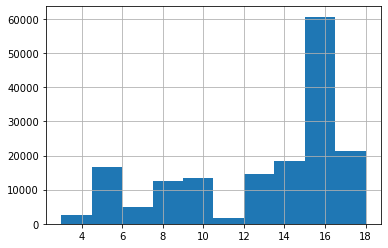

In [50]:
df['Product_Category_3'].hist()

<AxesSubplot:>

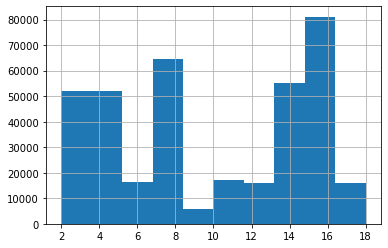

In [51]:
df['Product_Category_2'].hist()

<AxesSubplot:>

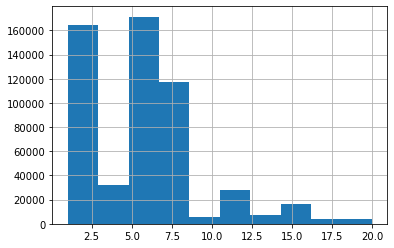

In [52]:
df['Product_Category_1'].hist()

<AxesSubplot:>

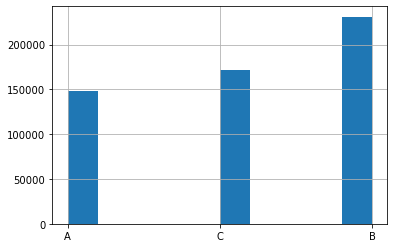

In [53]:
df['City_Category'].hist()

In [54]:
m = df['Product_Category_2'].mean()
df_with_mean = df.copy(deep=True)

df_with_mean['Product_Category_2'] = df['Product_Category_2'].fillna(m)

m = df['Product_Category_3'].mean()

df_with_mean['Product_Category_3'] = df['Product_Category_3'].fillna(m)

In [55]:
df_with_mean.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [56]:
df = df[df['Product_Category_2'].notnull()]
df = df[df['Product_Category_3'].notnull()]
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [57]:
print(df.shape[0])
print(df_with_mean.shape[0])

166821
550068


In [58]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [59]:
df_dummies = pd.get_dummies(df, columns=['City_Category']) 
df_dummies = pd.get_dummies(df_dummies, columns=['Gender']) 
df_dummies = pd.get_dummies(df_dummies, columns=['Age']) 
df_dummies = pd.get_dummies(df_dummies, columns=['Stay_In_Current_City_Years']) 


In [60]:
df_dummies_mean = pd.get_dummies(df_with_mean, columns=['City_Category']) 
df_dummies_mean = pd.get_dummies(df_dummies_mean, columns=['Gender']) 
df_dummies_mean = pd.get_dummies(df_dummies_mean, columns=['Age']) 
df_dummies_mean = pd.get_dummies(df_dummies_mean, columns=['Stay_In_Current_City_Years']) 

In [61]:
df_dummies['Product_ID'] = df_dummies['Product_ID'].map(df_dummies['Product_ID'].value_counts(normalize=True)).astype(float)
df_dummies_mean['Product_ID'] = df_dummies_mean['Product_ID'].map(df_dummies_mean['Product_ID'].value_counts(normalize=True)).astype(float)

In [62]:
df_dummies_mean['User_ID'] = df_dummies_mean['User_ID'].map(df_dummies_mean['User_ID'].value_counts(normalize=True)).astype(float)

No se ven outliers muy diferenciados

<AxesSubplot:>

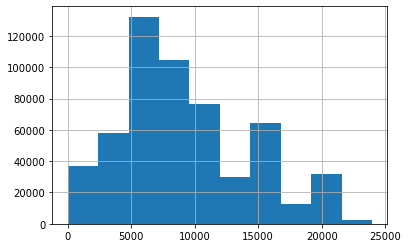

In [63]:
df_dummies_mean['Purchase'].hist()

Clasifico en 3 clases según el costo de la compra

<AxesSubplot:>

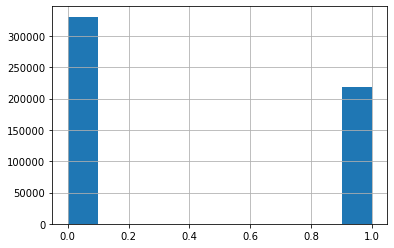

In [64]:
df_classification = df_dummies_mean.copy(deep=True)

limit = 9000

df_classification['amount_category'] = df_classification['Purchase'].map(lambda x: 1 if x > limit else 0)
df_classification['amount_category'].hist()

In [65]:
df_classification['Occupation'] = df_classification['Occupation'].map(df_classification['Occupation'].value_counts(normalize=True)).astype(float)

In [66]:
df_classification['Product_Category_1'] = df_classification['Product_Category_1'].map(df_classification['Product_Category_1'].value_counts(normalize=True)).astype(float)

In [67]:
df_classification['Product_Category_2'] = df_classification['Product_Category_2'].map(df_classification['Product_Category_2'].value_counts(normalize=True)).astype(float)

In [68]:
df_classification['Product_Category_3'] = df_classification['Product_Category_3'].map(df_classification['Product_Category_3'].value_counts(normalize=True)).astype(float)

In [69]:
df_classification.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,amount_category
0,0.000064,0.000413,0.023506,0,0.036746,0.315666,0.696727,8370,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.000064,0.001056,0.023506,0,0.255201,0.029934,0.033501,15200,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0.000064,0.000185,0.023506,0,0.007175,0.315666,0.696727,1422,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.000064,0.000620,0.023506,0,0.007175,0.100184,0.696727,1057,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.000140,0.000369,0.046123,0,0.207111,0.315666,0.696727,7969,0,0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
df_classification = pd.get_dummies(df_classification, columns=['amount_category']) 

In [27]:
y_classification = df_classification[['amount_category_0', 'amount_category_1']]
y_classification

,amount_category_0,amount_category_1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
550063,1,0
550064,1,0
550065,1,0
550066,1,0


In [74]:
df_classification.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'amount_category'],
      dtype='object')

In [75]:
X = df_classification[df_classification.columns.drop(['Purchase', 'amount_category'])]

In [76]:
X.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'City_Category_A', 'City_Category_B', 'City_Category_C', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [85]:
X = X.to_numpy()
y_classification = y_classification.to_numpy()
x_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0 ) - np.min(X, axis=0))


In [99]:
# Divido el dataset
idx = np.random.permutation(x_norm.shape[0])
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

X_train_classification = x_norm[train_idx]
y_train_classification = y_classification[train_idx]
X_test_classification = x_norm[valid_idx]
y_test_classification = y_classification[valid_idx]

n_train = X_train_classification.shape[0]
n_valid = X_test_classification.shape[0]

In [29]:
"""
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X, 
    y_classification,  
    test_size=0.3,
    random_state=42)
"""

In [30]:
"""
train_classification = torch.Tensor(X_train_classification.to_numpy()).type(torch.FloatTensor)
y_train_classification = torch.Tensor(y_train_classification.to_numpy()).type(torch.FloatTensor)

test_classification = torch.Tensor(X_test_classification.to_numpy()).type(torch.FloatTensor)
y_test_classification = torch.Tensor(y_test_classification.to_numpy()).type(torch.FloatTensor)
"""

In [100]:
class data_set(torch.utils.data.DataLoader):
    def __init__(self,x_param,y_param):
        self.X = x_param                           # set data
        self.Y = y_param                           # set lables

    def __len__(self):
        return self.X.shape[0]                   # return length

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]    # return list of batch data [data, labels]

In [101]:
classification_training_dataset = data_set(X_train_classification, y_train_classification)
classification_test_dataset = data_set(X_test_classification, y_test_classification)

In [102]:
# ahora el dataloader
classification_dataloader = {
    'train': torch.utils.data.DataLoader(classification_training_dataset, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(classification_test_dataset, batch_size=64, shuffle=False, pin_memory=True)
}

In [103]:
print(type(classification_dataloader))
print(type(classification_dataloader['train']))
print(len(classification_dataloader['train'].dataset))
print(len(classification_dataloader['test'].dataset))

<class 'dict'>
<class 'torch.utils.data.dataloader.DataLoader'>
467557
82511


In [104]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [339]:
# bloque de convolución para emplear en mi red

def conv_block(c_in, c_out, k=5, p=2, s=1, pk=3, ps=1, pp=1):
    return torch.nn.Sequential(
        torch.nn.Conv1d(c_in, c_out, k, padding=p, stride=s), # conv
        torch.nn.Sigmoid(),                                      # activation
        torch.nn.MaxPool1d(pk, stride=ps, padding=pp)         # pooling
    )

In [340]:
class CNN(torch.nn.Module):
  def __init__(self, n_channels=26, n_outputs=2):
    super().__init__()
    self.conv1 = conv_block(n_channels, 52)
    self.conv1_out = None
    self.conv2 = conv_block(52, 26)
    self.conv2_out = None
    #self.conv3 = conv_block(104, 52)
    #self.conv3_out = None
    self.fc = torch.nn.Linear(26, n_outputs)
    
    
    print('Red creada')
    print('arquitectura:')
    print(self)
    
    # Me fijo en el número de capas
    i=0
    for layer in self.children():
        i=i+1
    print('Número total de capas de CNN (conv+act+polling) + finales : ', i)
    
    # Me fijo en el número de parámetros entrenables
    pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
    print('Número total de parámetros a entrenar: ', pytorch_total_params)

  def n_layers(self):
    i=0
    for layer in self.children():
        i=i+1

    return i

  def n_parameters(self):
    pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
    return pytorch_total_params

  def validar_dim(self, tam):
    print("Validacion de dimensiones")
    x = torch.randn(64, int(tam))
    print("Tamaño entrada: ", x.shape)
    x = self.conv1(x)
    print("Tamaño salida conv1: ", x.shape)
    x = self.conv2(x)
    print("Tamaño salida conv2: ", x.shape)

    x = self.conv3(x)
    print("Tamaño salida conv3: ", x.shape)

    x = x.view(x.shape[0], -1)
    print("Tamaño imagen vectorizada: ", x.shape)
    x = self.fc(x)
    print("Tamaño salida fc (nro clases): ", x.shape)

  def forward(self, x):
    self.conv1_out = self.conv1(x)
    self.conv2_out = self.conv2(self.conv1_out)
    #self.conv3_out = self.conv3(self.conv2_out)
    y = self.conv2_out.view(self.conv2_out.shape[1], -1)
    y = self.fc(y)
    return y
    

In [341]:
def fit(model, dataloader, epochs=15):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    #criterion = torch.nn.SoftMarginLoss()
    epoch_t_loss = []
    epoch_v_loss = []
    epoch_t_acc = []
    epoch_v_acc = []
    for epoch in range(1, epochs+1):

        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            X = X.permute(1, 0)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y.type(torch.FloatTensor))
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())            
            acc = (torch.torch.argmax(y, axis=1) == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            #bar.set_description(f"acc {np.mean(train_acc):.5f}")     
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        epoch_t_loss.append(np.mean(train_loss))
        epoch_t_acc.append(np.mean(train_acc))
        
        
    plt.figure()
    plt.plot(epoch_t_loss, 'r')
    plt.title('loss')
    plt.legend(['train loss'])
    plt.grid()

    plt.figure()
    plt.plot(epoch_t_acc, 'r')
    plt.title('acc')
    plt.legend(['train acc'])
    plt.grid()
    plt.show()

In [253]:
def test_acc(model, dataloader):
    model.to(device)
    train_acc = []

    bar = tqdm(dataloader['test'])
    for batch in bar:
        X, y = batch
        X = X.permute(1, 0)
        X, y = X.to(device), y.to(device)
        y_hat = model(X)
        acc = (torch.torch.argmax(y, axis=1) == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
        train_acc.append(acc)
        #bar.set_description(f"acc {np.mean(train_acc):.5f}")
        
    v_acc  = np.mean(train_acc)

    print(f"Test accuracy {np.mean(v_acc):.5f}")
    plt.figure()
    plt.plot(train_acc, 'r')


    return v_acc

In [342]:
model = CNN()
fit(model, classification_dataloader, epochs=100)
accuracy = test_acc(model, classification_dataloader)
print(f"accuracy {accuracy:.5f}")

Red creada
arquitectura:
CNN(
  (conv1): Sequential(
    (0): Conv1d(26, 52, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): Sigmoid()
    (2): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv1d(52, 26, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): Sigmoid()
    (2): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=26, out_features=2, bias=True)
)
Número total de capas de CNN (conv+act+polling) + finales :  3
Número total de parámetros a entrenar:  13652


In [105]:
# Arquitectura
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=24, out_features=72, bias=True)
    self.non_linear_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 72, out_features=36, bias=True)
    self.non_linear_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features = 36, out_features=18, bias=True)
    self.non_linear_3 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 18, out_features= 2, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.non_linear_1(x)
    x = self.linear_2(x)
    x = self.non_linear_2(x)

    x = self.linear_3(x)
    x = self.non_linear_3(x)
    
    x = self.output(x)
    return x

 Epoch 0 | Train/Valid loss: 0.009 / 0.028 | Train/Valid Diff: 0.741 / 0.808
 Epoch 1 | Train/Valid loss: 0.008 / 0.033 | Train/Valid Diff: 0.809 / 0.819
 Epoch 2 | Train/Valid loss: 0.008 / 0.066 | Train/Valid Diff: 0.819 / 0.821
 Epoch 3 | Train/Valid loss: 0.010 / 2.528 | Train/Valid Diff: 0.683 / 0.664
 Epoch 4 | Train/Valid loss: 0.010 / 0.525 | Train/Valid Diff: 0.682 / 0.729
 Epoch 5 | Train/Valid loss: 0.008 / 0.268 | Train/Valid Diff: 0.780 / 0.770
 Epoch 6 | Train/Valid loss: 0.008 / 0.035 | Train/Valid Diff: 0.797 / 0.804
 Epoch 7 | Train/Valid loss: 0.008 / 0.058 | Train/Valid Diff: 0.799 / 0.804
 Epoch 8 | Train/Valid loss: 0.008 / 0.060 | Train/Valid Diff: 0.798 / 0.796
 Epoch 9 | Train/Valid loss: 0.008 / 0.097 | Train/Valid Diff: 0.794 / 0.802
 Epoch 10 | Train/Valid loss: 0.008 / 0.151 | Train/Valid Diff: 0.799 / 0.803
 Epoch 11 | Train/Valid loss: 0.008 / 0.116 | Train/Valid Diff: 0.798 / 0.805
 Epoch 12 | Train/Valid loss: 0.008 / 0.275 | Train/Valid Diff: 0.784 / 0.

Text(0, 0.5, 'MSE')

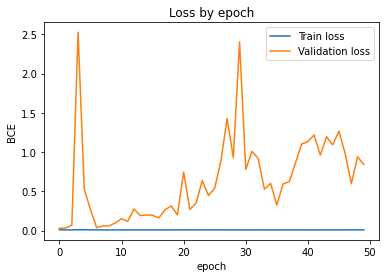

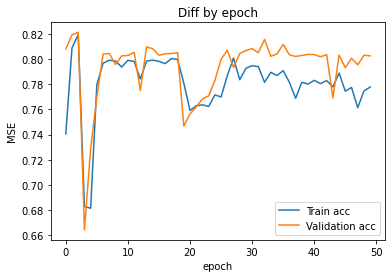

In [106]:
n_train = X_train_classification.shape[0]
n_valid = X_test_classification.shape[0]
# Instanciamos la red
nnet = NNet()
# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)
# Función de pérdida y optimizador
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

# Algoritmo Mini-batch

# cantidad de epochs
epochs = 50

train_loss_by_epoch=[]
valid_loss_by_epoch=[]
train_acc_by_epoch=[]
valid_acc_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_acc = []
  epoch_y = []
  train_diff = 0
   
  for i,data in enumerate(classification_dataloader['train']):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float()

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(y_batch_hat, y_batch)
    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    acc = (torch.torch.argmax(y_batch, axis=1) == torch.argmax(y_batch_hat, axis=1)).sum().item() / len(y_batch)
    epoch_acc.append(acc)
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  train_acc_by_epoch.append(np.mean(epoch_acc))
  

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []
  valid_epoch_acc = []

  for i,data in enumerate(classification_dataloader['test']):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float()

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = nnet_output # torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    acc = (torch.torch.argmax(y_batch, axis=1) == torch.argmax(y_batch_hat, axis=1)).sum().item() / len(y_batch)
    valid_epoch_acc.append(acc)
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_acc_by_epoch.append(np.mean(valid_epoch_acc))
  

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  #print(" Epoch {epoch} | " \
  #      f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | ")
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid Diff: {np.mean(epoch_acc):.3f} / {np.mean(valid_epoch_acc):.3f}")


# Grafica loss por epoch
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")


fig, ax1= plt.subplots(1,1)
ax1.plot(train_acc_by_epoch, label="Train acc")
ax1.plot(valid_acc_by_epoch, label="Validation acc")
ax1.legend()
ax1.set_title("Diff by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("MSE")

In [107]:
torch.save(nnet.state_dict(), 'nnet/nnet_classification_8_capas.pth')
#torch.save(model.state_dict(), 'nnet/cnn_classification_4_bloques.pth')

Vemos el comportamiento de ambas redes

In [111]:
X_test_classification[0]

array([0.39803922, 0.11601916, 0.33669201, 0.        , 0.13156129,
       0.02833329, 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        ])

In [113]:
i = 0

for index in range(2000):
    t = torch.tensor(X_test_classification[index]).float().unsqueeze(0)
    y_hat = nnet.forward(t)
    i = i + torch.argmax(y_hat).item()
    #print("Tiene razon la prediccion?")
    #print((y_test_classification[index][torch.argmax(y_hat)] == 1).item())

print(i)

775


In [164]:
for index in [50, 100, 150, 200]:
    print("NNET")
    t = torch.tensor(X_test_classification[index]).float().unsqueeze(0)
    y_hat = nnet.forward(t)
    print("Valor predicho")
    print(y_hat)
    print("Tiene razon la prediccion?")
    print((y_test_classification[index][torch.argmax(y_hat)] == 1).item())

NNET
Valor predicho
tensor([[-11.0991,  38.3818]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[-117.6782,  378.5925]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[  8.3934, -17.5548]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[ 1165.6718, -1738.4077]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True


In [166]:
print(len(df_with_mean['Product_ID'].unique()))
print(len(df_with_mean['User_ID'].unique()))

3631
5891


In [125]:
user_id_to_idx = {value:i for i,value in enumerate(df_with_mean['User_ID'].unique())}
product_id_to_idx = {value:i for i,value in enumerate(df_with_mean['Product_ID'].unique())}

In [126]:
user_idx = np.array([user_id_to_idx[value] for value in df_with_mean['User_ID']])
product_idx = np.array([product_id_to_idx[value] for value in df_with_mean['Product_ID']])

In [127]:
# Divido el vector en entrenamiento y validación
user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]

product_idx_train = product_idx[train_idx]
product_idx_valid = product_idx[valid_idx]

In [154]:
len(df_classification['User_ID'].unique())

482

In [150]:
product_idx_train

array([ 206,  734, 1645, ...,  201, 1599,  529])

In [128]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings(torch.utils.data.DataLoader):

  def __init__(self, x, user_idx, product_idx, y):
    self.x = x
    self.user_idx = user_idx
    self.product_idx = product_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.user_idx[idx], self.product_idx[idx], self.y[idx]

In [129]:
train_ds_embeddings = MyDatasetWithEmbddings(X_train_classification, user_idx_train, product_idx_train, y_train_classification)
valid_ds_embeddings = MyDatasetWithEmbddings(X_test_classification, user_idx_valid, product_idx_valid, y_test_classification)

In [131]:
train_dataloader_emb = torch.utils.data.DataLoader(train_ds_embeddings, batch_size =64, shuffle= True)
valid_dataloader_emb = torch.utils.data.DataLoader(valid_ds_embeddings, batch_size=64)

In [177]:
# Arquitectura con embeddings
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.product_embeddings = torch.nn.Embedding(num_embeddings=3631, embedding_dim=16) #product_id
    self.user_embeddings = torch.nn.Embedding(num_embeddings=5891, embedding_dim=16) #user_id
    self.linear_1 = torch.nn.Linear(in_features=24+(16*2), out_features=72, bias=True)
    self.non_linear_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 72, out_features=36, bias=True)
    self.non_linear_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features = 36, out_features=18, bias=True)
    self.non_linear_3 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 18, out_features= 2, bias=True)

  def forward(self, x, user_idx, product_idx):
    product_embeddings_outputs = self.product_embeddings(product_idx)
    user_embeddings_outputs = self.user_embeddings(user_idx)
    x = torch.cat([x, product_embeddings_outputs], dim=1)
    x = torch.cat([x, user_embeddings_outputs], dim=1)
    x = self.linear_1(x)
    x = self.non_linear_1(x)
    x = self.linear_2(x)
    x = self.non_linear_2(x)

    x = self.linear_3(x)
    x = self.non_linear_3(x)
    
    x = self.output(x)
    return x

In [178]:
nnnetWithEmbeddings = NNetWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

In [179]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
# Optimizador con regularización L2 (parámetro weight_decay)
optimizer = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.001, weight_decay=0.01) 

In [180]:
# Mini-Batch

# cantidad de epochs
epochs = 50

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  nnnetWithEmbeddings.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader_emb):
    # Obtengo los datos del batch de entrenamiento
    x_batch, user_embed_batch, product_embed_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    user_embed_batch = user_embed_batch.to(device).int()
    product_embed_batch = product_embed_batch.to(device).int()
    y_batch = y_batch.to(device).float()

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnnetWithEmbeddings(x_batch, user_embed_batch, product_embed_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnnetWithEmbeddings.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader_emb):
    # Obtengo los datos del batch de validación
    x_batch, user_embed_batch, product_embed_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    user_embed_batch = user_embed_batch.to(device).int()
    product_embed_batch = product_embed_batch.to(device).int()
    y_batch = y_batch.to(device).float()

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnnetWithEmbeddings(x_batch, user_embed_batch, product_embed_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.668 / 0.550 | Train/Valid accuracy: 0.846 / 0.876
 Epoch 1 | Train/Valid loss: 0.534 / 0.528 | Train/Valid accuracy: 0.880 / 0.881
 Epoch 2 | Train/Valid loss: 0.523 / 0.523 | Train/Valid accuracy: 0.881 / 0.882
 Epoch 3 | Train/Valid loss: 0.515 / 0.519 | Train/Valid accuracy: 0.883 / 0.883
 Epoch 4 | Train/Valid loss: 0.509 / 0.517 | Train/Valid accuracy: 0.884 / 0.883
 Epoch 5 | Train/Valid loss: 0.504 / 0.517 | Train/Valid accuracy: 0.886 / 0.883
 Epoch 6 | Train/Valid loss: 0.500 / 0.512 | Train/Valid accuracy: 0.887 / 0.883
 Epoch 7 | Train/Valid loss: 0.495 / 0.508 | Train/Valid accuracy: 0.888 / 0.885
 Epoch 8 | Train/Valid loss: 0.491 / 0.506 | Train/Valid accuracy: 0.890 / 0.886
 Epoch 9 | Train/Valid loss: 0.486 / 0.505 | Train/Valid accuracy: 0.891 / 0.886
 Epoch 10 | Train/Valid loss: 0.482 / 0.508 | Train/Valid accuracy: 0.892 / 0.885
 Epoch 11 | Train/Valid loss: 0.480 / 0.507 | Train/Valid accuracy: 0.892 / 0.885
 Epoch 12 | Train/Valid lo

In [181]:
torch.save(nnnetWithEmbeddings.state_dict(), 'nnet/nnnet_with_embeddings_16_valores.pth')

El resultado del modelo fue mejorando a medida que se trabajó el dataset. Las primeras pruebas fueron sin normalizar y se nota que los valores altos como user id y product id influian mucho. Luego al normalizar el score mejoró. 

El dataset contenia una gran cantidad valores nulos para las columnas de categoria de productos. Decidí imputarlos por el promedio en lugar de omitir los valores nulos ya que perdia muchas filas del dataset

Luego, probé con una red convolucional y una con capas lineales y relu, obteniendo resultados similares. Opté por dejar la red de capas lineales que tuvo resultados aceptables.

Por último implementé embeddings para usuarios y productos. Probé con 8 y con 16 valores por fila, obteniendo mejores resultados con 16. Esto implica mayor cantidad de parámetros a entrenar, por lo que el modelo entrena mas lento, sin embargo obtuve mejores resultados por lo que fue el modelo que deje.

Al final persistí ambos modelos para no perder los entrenamientos.

En conclusión, para estos casos donde se tienen ids y los ids representan entidades importantes para el modelo que queremos entrenar, debemos mantener estos datos en el dataset para no perder representatividad y caer en underfiting. Para los casos donde la granularidad es baja podemos hacer one hot encoding, pero para los casos donde la granularidad sube y sobre todo en este caso donde habia miles de valores para cada columna, conviene hacer uso de embedings para mantener los datos con la representatividad adecuada para que la red pueda interpretarlos.